In [1]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
import pandas as pd

In [3]:
from upsetplot import plot

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# LINCS

In [5]:
df_lincs_var = pd.read_parquet('lincs_formatted_normalized_cellosaurus.parquet')

In [6]:
df_lincs_var = df_lincs_var.drop_duplicates('cellosaurus_id')

In [7]:
set_names = df_lincs_var['cellosaurus_id'].values

In [8]:
df_lincs_var_ = df_lincs_var[df_lincs_var.columns[14380:]].fillna(0)

In [9]:
cols = np.array(df_lincs_var_.columns)

In [10]:
df_lincs_var_ = df_lincs_var_.astype(int)

In [11]:
cnt = []
names = []
for row in df_lincs_var_.values:
    row_s = np.argsort(row)
    cnt.append([row[row_s][-5:].sum().item()] + row[row_s][-5:].tolist())
    names.append(['other'] + cols[row_s[-5:]].tolist())

In [12]:
cnt = np.array(cnt).T
names = np.array(names).T


/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_7447/3296461653.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0.5, 1.0, 'LINCS L1000')

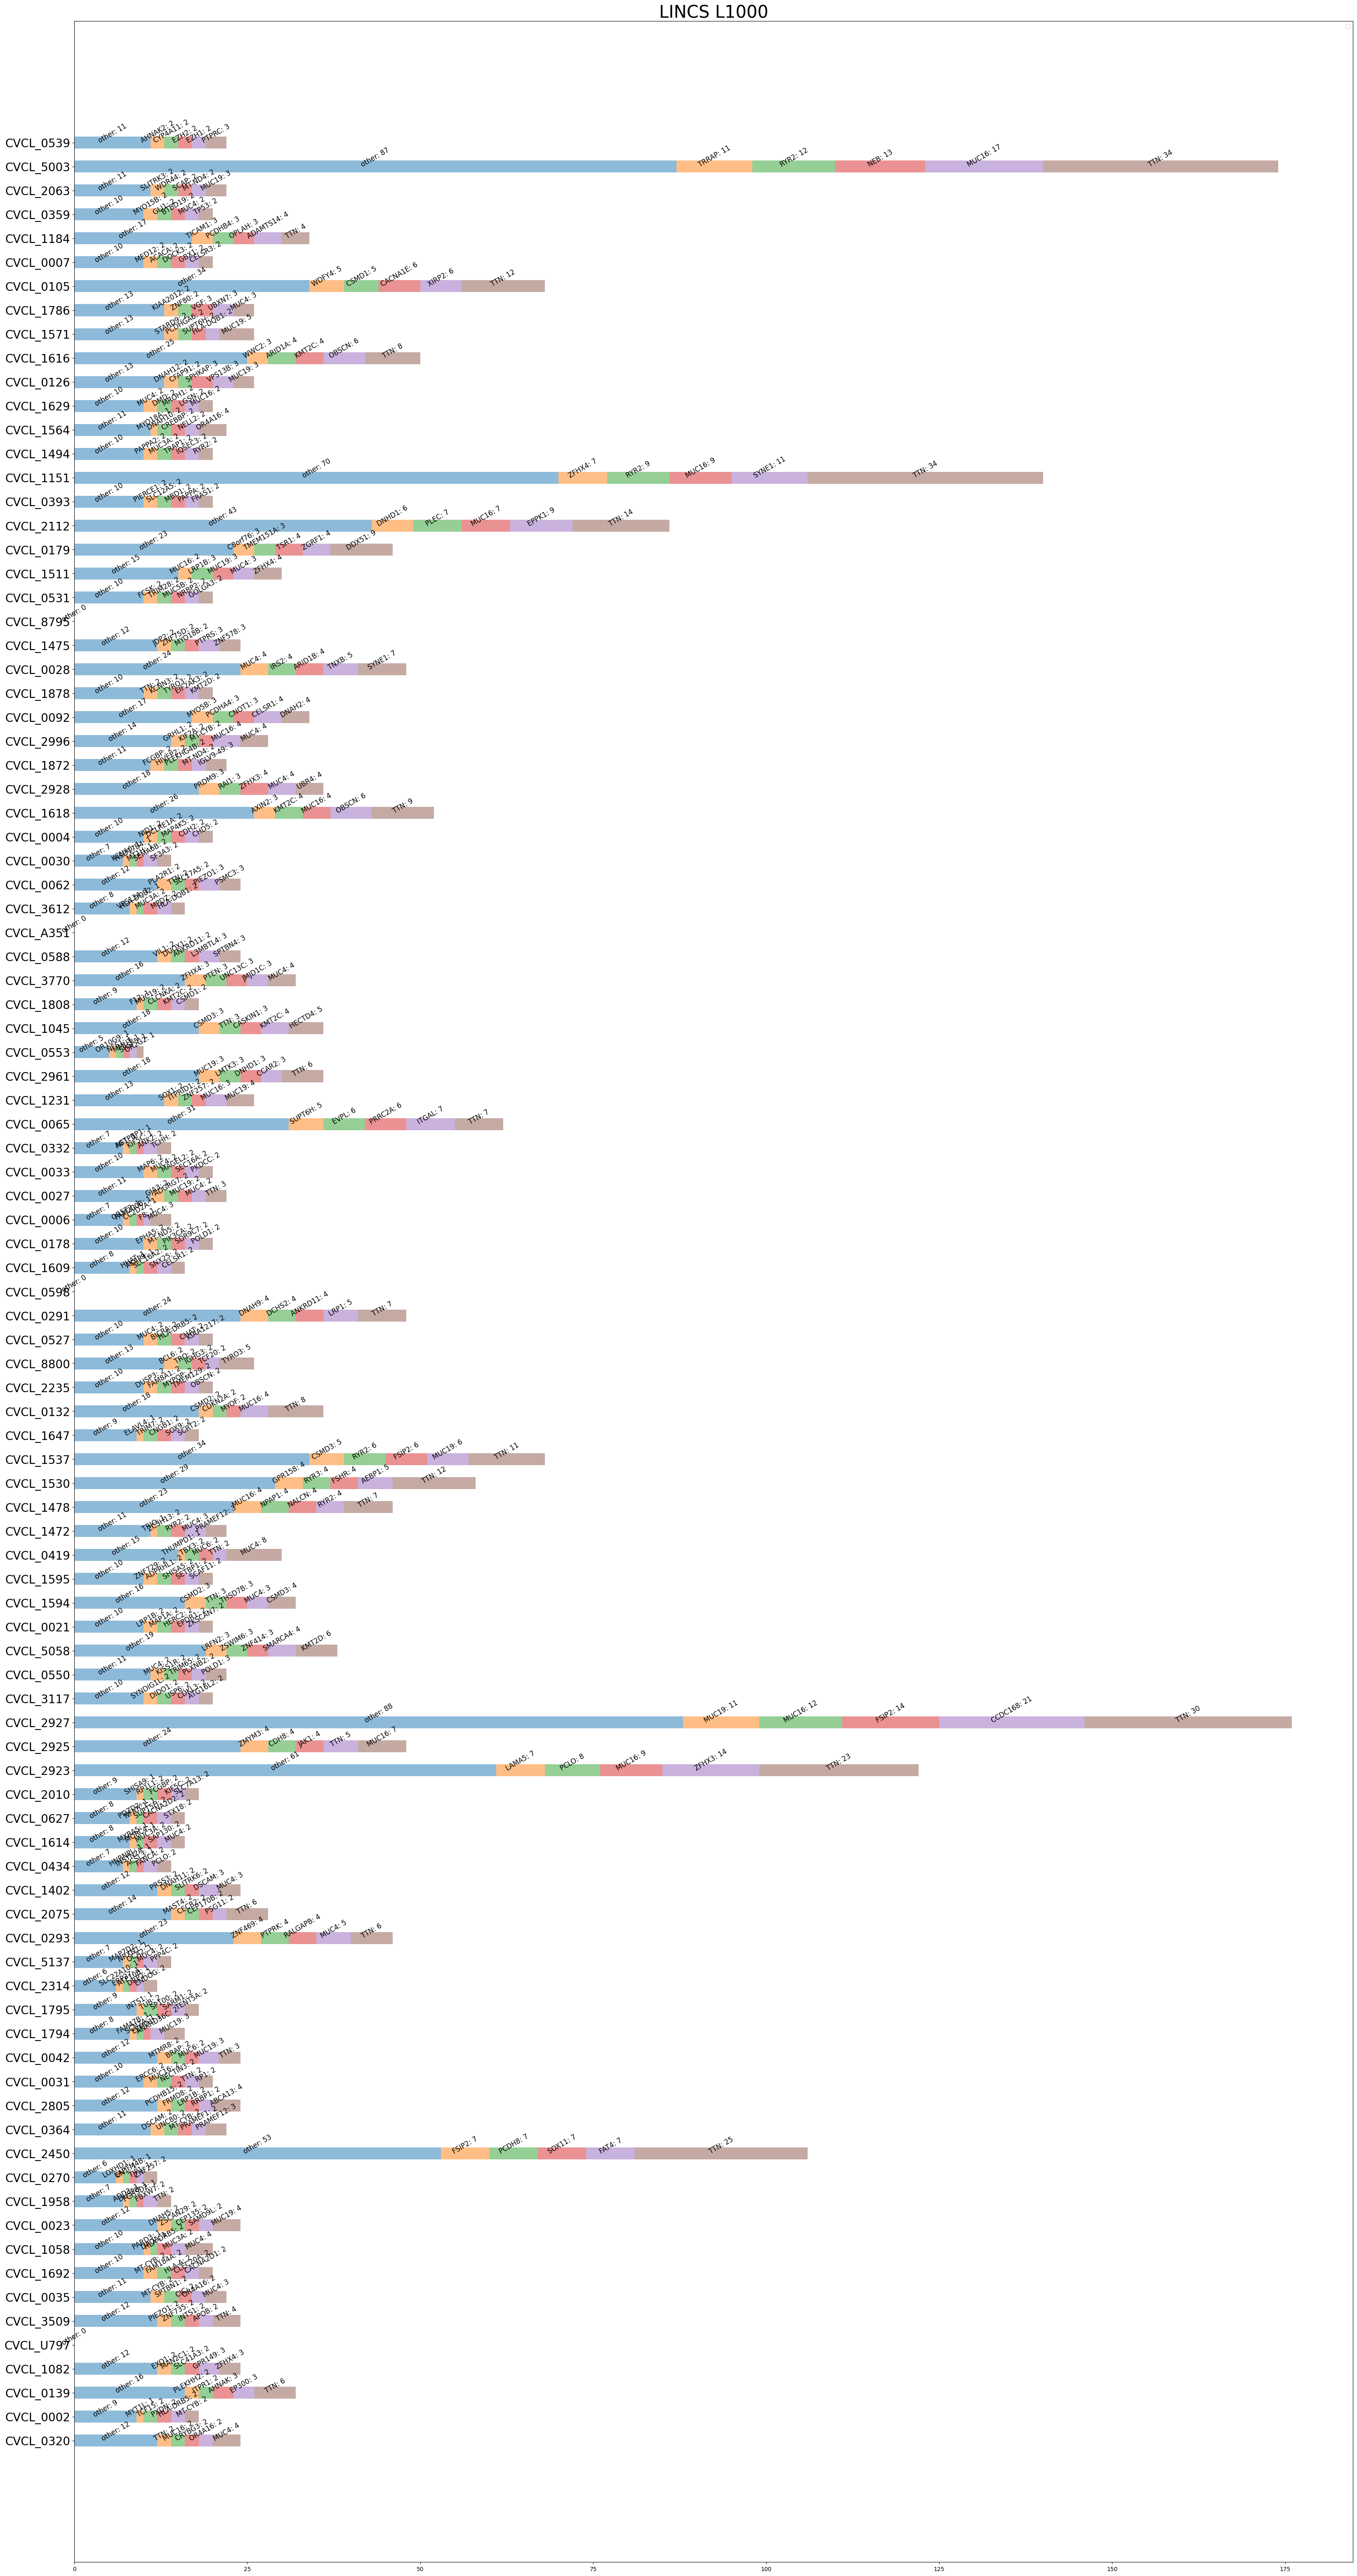

In [13]:
fig, ax = plt.subplots(figsize=(40, 80))
y = 0
for i in range(len(cnt)):
    ax.barh(set_names, cnt[i], left=y, height=0.5, alpha=0.5)
    y += cnt[i]

plt.yticks(fontsize=20)

# Labels
for i, bar in enumerate(ax.patches):
  if (bar.get_x() != 0) or names.reshape(-1)[i] == 'other':
      ax.text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              names.reshape(-1)[i] + ': ' + str(bar.get_width()), ha = 'center', rotation=30, size=12)

ax.legend()
ax.set_title('LINCS L1000', fontsize=30)

# Tahoe

In [14]:
df_tahoe_var = pd.read_parquet('tahoe_formatted_normalized_separate_scaler_for_genes_same_scaler_for_dosage_cellosaurus.parquet')

In [15]:
df_tahoe_var = df_tahoe_var.drop_duplicates('cellosaurus_id')

In [16]:
set_names = df_tahoe_var['cellosaurus_id'].values

In [17]:
df_tahoe_var_ = df_tahoe_var[df_tahoe_var.columns[14380:]].fillna(0)

In [18]:
cols = np.array(df_tahoe_var_.columns)

In [19]:
df_tahoe_var_ = df_tahoe_var_.astype(int)

In [20]:
cnt = []
names = []
for row in df_tahoe_var_.values:
    row_s = np.argsort(row)
    cnt.append([row[row_s][-5:].sum().item()] + row[row_s][-5:].tolist())
    names.append(['other'] + cols[row_s[-5:]].tolist())

In [21]:
cnt = np.array(cnt).T
names = np.array(names).T

/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_7447/4066679912.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0.5, 1.0, 'Tahoe')

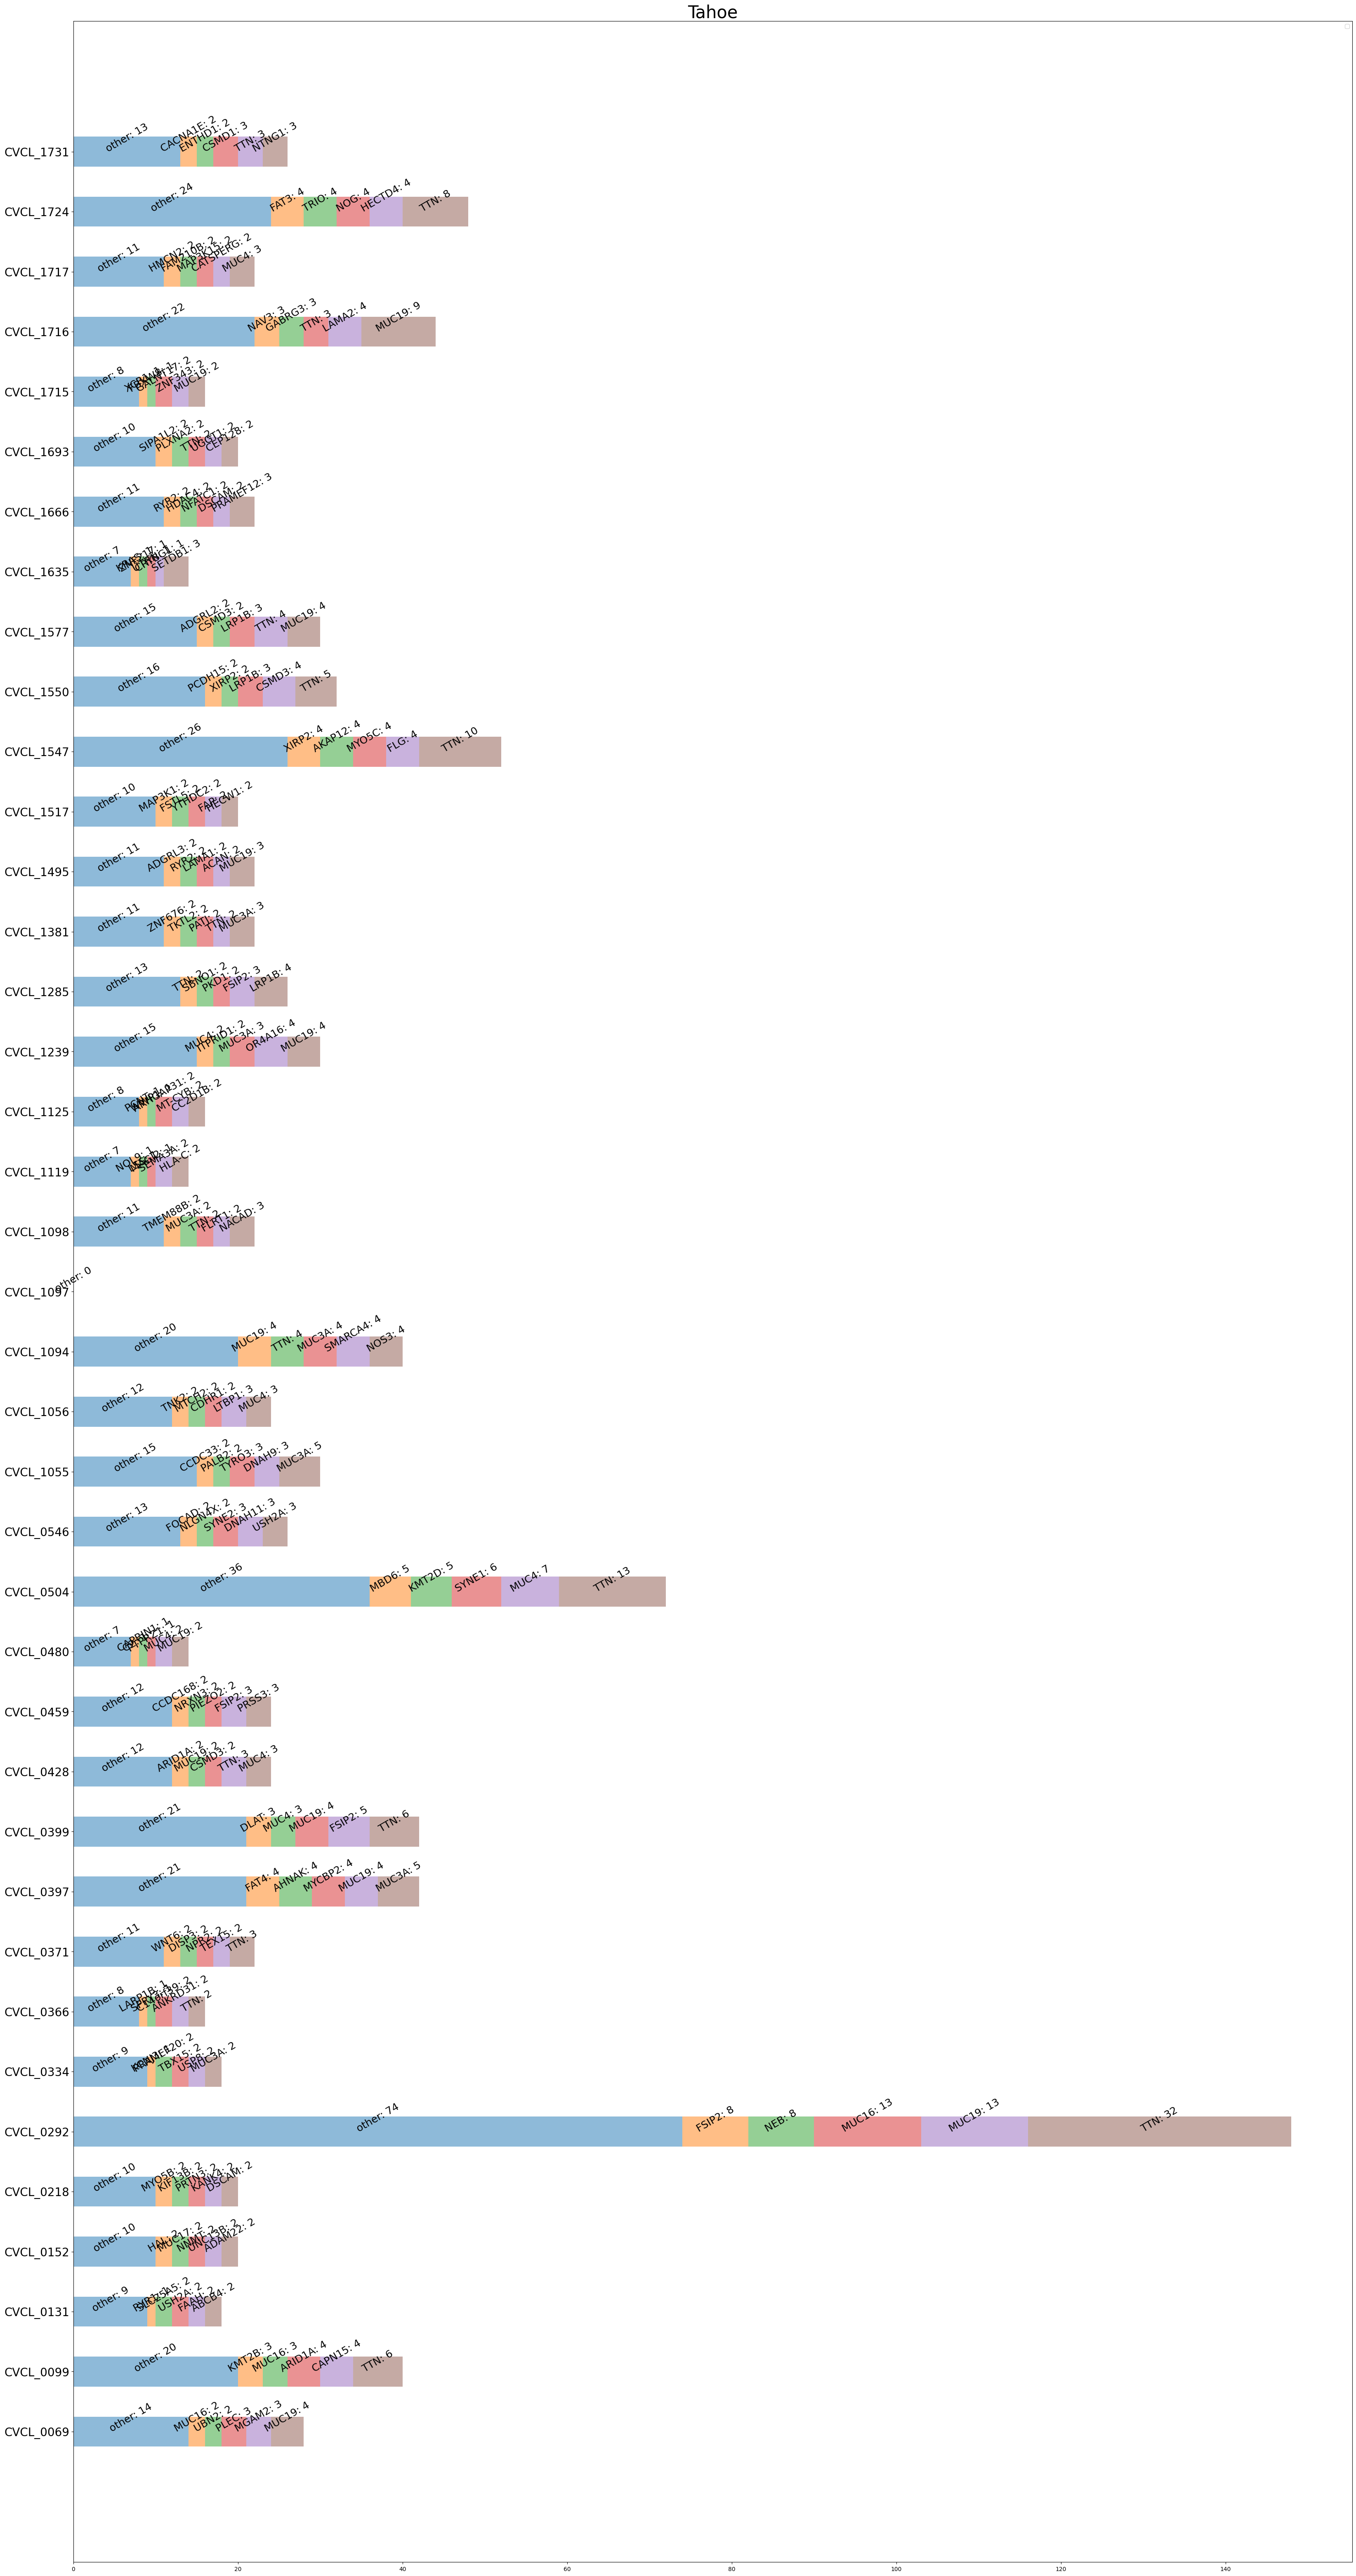

In [22]:
fig, ax = plt.subplots(figsize=(40, 80))
y = 0
for i in range(len(cnt)):
    ax.barh(set_names, cnt[i], left=y, height=0.5, alpha=0.5)
    y += cnt[i]

plt.yticks(fontsize=20)

# Labels
for i, bar in enumerate(ax.patches):
  if (bar.get_x() != 0) or names.reshape(-1)[i] == 'other':
      ax.text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              names.reshape(-1)[i] + ': ' + str(bar.get_width()), ha = 'center', rotation=30, size=18)

ax.legend()
ax.set_title('Tahoe', fontsize=30)